# apple_health simple usage
Author: Keita Mizukoshi

In [1]:
import pandas as pd
import datetime as dt
from apple_health import manager

import matplotlib.pyplot as plt

In [2]:
man = manager()

In [3]:
man.help()

Usage: 
man.path = '/path/to/your/zipfile/'
man.zip_name = 'export.zip', for example

If you want dates as datetime types
man.as_datetime = True
Then,
df = man.get_df()


In [4]:
# Configures
man.path = '/Users/mzks/Downloads/'
man.zip_name = 'export.zip'

man.as_datetime = True

In [5]:
%%time
df = man.get_df()

CPU times: user 50.4 s, sys: 1.62 s, total: 52 s
Wall time: 52.7 s


In [6]:
df.head()

,date,start_date,value,type
0,2017-10-27 11:43:00+09:00,2017-10-27 11:43:00+09:00,30.9513,bmi
1,2017-10-27 11:44:18+09:00,2017-10-27 11:44:18+09:00,30.8112,bmi
2,2017-10-27 11:44:38+09:00,2017-10-27 11:44:38+09:00,30.8112,bmi
3,2017-10-27 11:46:42+09:00,2017-10-27 11:46:42+09:00,30.8813,bmi
4,2017-10-27 12:12:09+09:00,2017-10-27 12:12:09+09:00,31.1264,bmi


In [7]:
set(df['type'])

{'active_energy',
 'basal_energy',
 'besa_body_temp',
 'bmi',
 'body_fat',
 'body_mass',
 'body_temp',
 'calcium',
 'carbohydrates',
 'dietary_energy',
 'dist_walk_run',
 'env_audio_exposure',
 'exercise_time',
 'fat_saturated',
 'fat_total',
 'fiber',
 'flights_climbed',
 'heart_rate',
 'heart_rate_sdnn',
 'height',
 'iron',
 'lean_body_mass',
 'protein',
 'reboflavin',
 'resting_heart_rate',
 'sodium',
 'stand_time',
 'step_count',
 'suger',
 'thiamin',
 'vitamin_A',
 'vitamin_C',
 'vitamin_E',
 'vo2_max',
 'walking_heart_rate_average'}

Text(0, 0.5, 'Body mass (kg)')

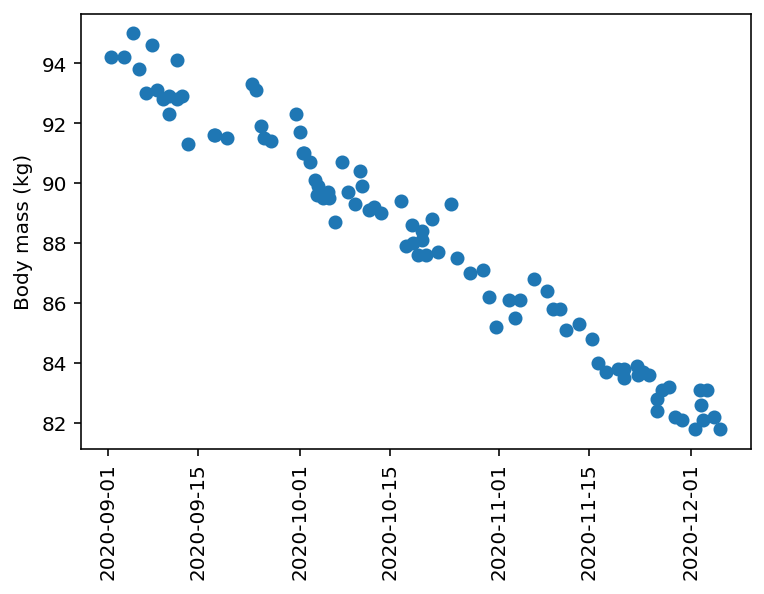

In [8]:
init_date = dt.datetime(2020,9,1,tzinfo=dt.timezone(dt.timedelta(hours=9)))
_df = df[df['type']=='body_mass']
_df = _df[_df['date'] > init_date]
plt.plot(_df['date'], _df['value'], 'o')
plt.xticks(rotation='vertical')
plt.ylabel('Body mass (kg)')